# [Ïã§Ïäµ1] Deep Q-Network Íµ¨ÌòÑ Ïã§Ïäµ (Ï†ïÎãµ)

Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî Îã®Ïàú Q-LearningÏúºÎ°úÎäî ÎåÄÏùëÌï† Ïàò ÏóÜÎäî, StateÍ∞Ä Îß§Ïö∞ ÎßéÏùÄ ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌôòÍ≤ΩÏóê Deep Q-NetworkÎ•º Íµ¨ÌòÑ Î∞è Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

### ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.
import gymnasium as gym
import numpy as np
import pandas as pd

# ÌïôÏäµÏùÑ ÏôÑÎ£åÌïú ÏóêÏù¥Ï†ÑÌä∏Î•º ÏãúÍ∞ÅÌôîÌïòÎäîÎç∞ ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Epsilon-Greedy Î•º Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú random Î™®ÎìàÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
import random

# Îî•Îü¨Îãù Î™®Îç∏ÏùÑ ÌÜµÌï¥ Q-NetworkÎ•º Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.
import torch
import torch.nn as nn

from tqdm import tqdm

from collections import deque

/tmp/ipykernel_73/272604880.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.

In [2]:
def visualize_render_queue(render_queue):
    fig = plt.figure()
    ims = []
    for i in range(len(render_queue)):
        im = plt.imshow(render_queue[i], animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                    repeat_delay=1000)
    
    return HTML(ani.to_jshtml())

## 1. CartPole ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌôòÍ≤Ω

ÎßàÏ∞∞Ïù¥ ÏóÜÎäî ÏÑ†Î°úÏóêÏÑú ÏñëÏòÜÏúºÎ°ú Ïù¥ÎèôÌï† Ïàò ÏûàÎäî Ïπ¥Ìä∏Î•º Ï¢åÏö∞Î°ú ÏõÄÏßÅÏù¥Î©¥ÏÑú ÏúÑÏóê ÏÑ∏Ïö¥ Í∏∞Îë•ÏùÑ ÏµúÎåÄÌïú Ïò§Îûò ÏÑ∏Ïö¥ Ï±ÑÎ°ú Ïú†ÏßÄÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏù∏ ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌôòÍ≤ΩÏûÖÎãàÎã§. <br>

![CartPole](./images/cart_pole.gif)

EnvironmentÎäî Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï†ïÏùòÎê©ÎãàÎã§.

- ÏÉÅÌÉú ÏßëÌï© S = Î™®Îì† Í∞ÄÎä•Ìïú (Ïπ¥Ìä∏Ïùò ÏúÑÏπò, Ïπ¥Ìä∏Ïùò ÏÜçÎèÑ, Í∏∞Îë•Ïùò Í∞ÅÎèÑ, Í∏∞Îë•Ïùò Í∞ÅÏÜçÎèÑ) Ï°∞Ìï©

| ÏöîÏÜå | ÏµúÏÜåÍ∞í | ÏµúÎåÄÍ∞í |
|---|---|---|
| Ïπ¥Ìä∏Ïùò ÏúÑÏπò(m) | -4.8 | 4.8 |
| Ïπ¥Ìä∏Ïùò ÏÜçÎèÑ(m/s) | ÏùåÏùò Î¨¥ÌïúÎåÄ | ÏñëÏùò Î¨¥ÌïúÎåÄ |
| Í∏∞Îë•Ïùò Í∞ÅÎèÑ(rad) | ÏïΩ -0.418 (-24ÎèÑ) | ÏïΩ 0.418 (24ÎèÑ) |
| Í∏∞Îë•Ïùò Í∞ÅÏÜçÎèÑ(rad/s) | ÏùåÏùò Î¨¥ÌïúÎåÄ | ÏñëÏùò Î¨¥ÌïúÎåÄ |

- Í∞ÄÎä•Ìïú ÌñâÎèô ÏßëÌï© A = {ÏôºÏ™ΩÏúºÎ°ú Í∞ÄÍ∏∞, Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∞ÄÍ∏∞}
- Ï†ÑÏù¥ Ìï®Ïàò P: ÌòÑÏû¨ ÏÉÅÌÉúÏóêÏÑú ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌôòÍ≤ΩÏóêÏÑú ÌñâÎèôÏùÑ 1ÌîÑÎ†àÏûÑ ÏàòÌñâÌïú ÏÉÅÌÉúÎ°ú Ï†ÑÏù¥
- Î≥¥ÏÉÅ Ìï®Ïàò R: Í∏∞Îë•Ïù¥ ÏÑ∏ÏõåÏ†∏ ÏûàÏùÑ Îïå Îß§ ÌîÑÎ†àÏûÑÎßàÎã§ +1
  - Í∏∞Îë•Ïù¥ Ï¢åÏö∞Î°ú 12ÎèÑ Ïù¥ÏÉÅ Í∏∞Ïö∏Ïñ¥Í±∞ÎÇò, Ïπ¥Ìä∏Ïùò ÏúÑÏπòÍ∞Ä ¬±2.4 Î•º ÎÑòÏñ¥ÏÑúÎ©¥ episode Ï¢ÖÎ£å
- Í∞êÍ∞ÄÏú® Œ≥ (gamma) = 0.9 (CartPole ÌôòÍ≤ΩÏùò ÏûêÏ≤¥ ÏÑ§Ï†ïÏù¥ ÏïÑÎãàÎùº, ÏûÑÏùòÎ°ú ÏÑ§Ï†ïÌïú Í∞íÏûÖÎãàÎã§)

ÏïûÏÑ† Ïã§ÏäµÏùò ÌôòÍ≤ΩÍ≥º Îã¨Î¶¨ ÏÉÅÌÉú ÏßëÌï©Ïùò ÏõêÏÜåÏùò Í∞úÏàòÎäî Ïó∞ÏÜçÏ†ÅÏù¥Î©∞ Î¨¥ÌïúÌï©ÎãàÎã§. <br>
Ïù¥Îü¨Ìïú ÌôòÍ≤ΩÏóêÏÑúÎäî Î™®Îì† ÌôòÍ≤ΩÏóê ÎåÄÌï¥ Q-TableÏùÑ Ï†ïÏùòÌïòÎäî Í≤ÉÏù¥ Î∂àÍ∞ÄÎä•ÌïòÎØÄÎ°ú, Q-NetworkÎ•º ÌÜµÌï¥ Q-TableÏùÑ Í∑ºÏÇ¨ÌïòÎäî Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌôòÍ≤ΩÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÎûúÎç§Ìïú ÌñâÎèôÏùÑ ÏàòÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [3]:
# ÌôòÍ≤ΩÏùÑ ÏÉùÏÑ± Ìï©ÎãàÎã§. render_mode = 'rgb_array' Ïù∏ÏûêÎ•º ÏûÖÎ†•ÌïòÏó¨ ÌôòÍ≤ΩÏùÑ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
env = gym.make('CartPole-v1', render_mode='rgb_array')

# ÌôòÍ≤ΩÏùÑ Ï¥àÍ∏∞ÌôîÌïòÏó¨ ÏÉÅÌÉú s_0 ÏùÑ ÏñªÏäµÎãàÎã§.
state = env.reset()[0]

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Í∞Å ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥Î•º Ï†ÄÏû•ÌïòÎäî listÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
render_queue = []

# ÏóêÌîºÏÜåÎìúÍ∞Ä Ï¢ÖÎ£åÎê† ÎñÑ ÍπåÏßÄ ÎûúÎç§Ìïú Ïï°ÏÖòÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
done = False
while not done:
    # ÎûúÎç§Ìïú Ïï°ÏÖòÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
    action = env.action_space.sample()    
    # ÏÑ†ÌÉùÌïú Ïï°ÏÖòÏùÑ ÌôòÍ≤ΩÏóê Ï†ÅÏö©ÌïòÏó¨ Îã§Ïùå ÏÉÅÌÉú s_{t+1}ÏùÑ ÏñªÏäµÎãàÎã§.
    next_state, reward, done, _, _ = env.step(action)    
    # ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Í∞Å ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥Î•º Ï†ÄÏû•Ìï©ÎãàÎã§.
    render_queue.append(env.render())    
    # Îã§Ïùå ÏÉÅÌÉúÎ•º ÌòÑÏû¨ ÏÉÅÌÉúÎ°ú ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.
    state = next_state
# ÌôòÍ≤ΩÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.
env.close()

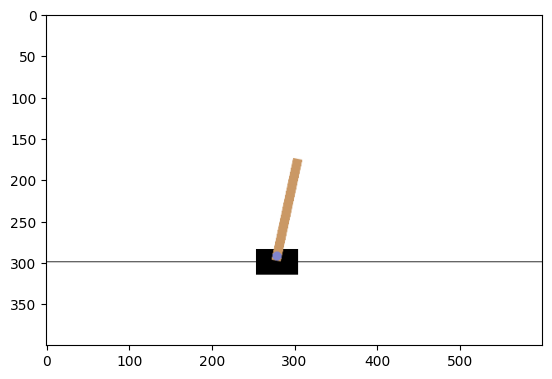

In [4]:
# ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
visualize_render_queue(render_queue)

ÎûúÎç§Ìïú ÌñâÎèôÏùÑ ÏàòÌñâÌñàÏùÑ Îïå ÎßâÎåÄÍ∏∞Í∞Ä Î∞îÎ°ú Ïì∞Îü¨ÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ï†ú Deep Q-NetworkÎ•º Íµ¨ÌòÑÌïòÏó¨ CartPole ÌôòÍ≤ΩÏóêÏÑú ÌïôÏäµÏùÑ ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

## 2. Deep Q-Network ÌïôÏäµ Íµ¨ÏÑ± ÏöîÏÜå Íµ¨ÌòÑ

Deep Q-Network ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏùò ÌïµÏã¨ Íµ¨ÏÑ±ÏöîÏÜåÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
1. Q Ìï®Ïàò, Target Q Ìï®Ïàò
2. Î™©ÌëúÌï®Ïàò
3. Replay Buffer

Deep Q-Network ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏàúÏÑúÎ°ú ÏßÑÌñâÎê©ÎãàÎã§.
1. ÌôòÍ≤ΩÏóêÏÑú ÏûÖÎ†• Î∞õÏùÄ ÏÉÅÌÉú $x_t$Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_t$ Î°ú Î≥ÄÌôòÌïúÎã§.
2. Q Ìï®ÏàòÏóê Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_t$Î•º ÏûÖÎ†•ÌïòÍ≥†, ÏÉùÏÑ±Ìïú ÌñâÎèô $ùëé_ùë°$Î•º ÌôòÍ≤ΩÏóê ÏûÖÎ†•ÌïúÎã§.
3. ÌôòÍ≤ΩÏù¥ Îã§Ïùå ÏÉÅÌÉú $x_{t+1}$Í≥º Î≥¥ÏÉÅ $r_t$, ÏôÑÎ£å Ïó¨Î∂Ä $d_t$Î•º Î∞òÌôòÌïúÎã§. 
4. Î∞òÌôòÎêú $x_{t+1}$Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_{t+1}$ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, $(s_t,a_t,r_t,s_{t+1},d_t)$ ÏùÑ Replay BufferÏóê Ï†ÄÏû•ÌïúÎã§.
5. Replay BufferÏóê Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎã§Î©¥, Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Ïùº Îïå ÍπåÏßÄ 1~4Î•º Î∞òÎ≥µÌïúÎã§.<br><br>
6. Replay BufferÏóêÏÑú $D$Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎûúÎç§ÌïòÍ≤å ÏÑ†ÌÉùÌïòÏó¨ Q Ìï®ÏàòÏôÄ Target Q Ìï®ÏàòÏóê ÏûÖÎ†•ÌïúÎã§.
7. Î™©ÌëúÌï®ÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú Ïã†Í≤ΩÎßù $\theta$Î•º ÌïôÏäµÏãúÌÇ®Îã§.
   1. Î™©ÌëúÌï®ÏàòÏóê ÎåÄÌï¥ÏÑ† Î™©ÌëúÌï®ÏàòÎ•º Íµ¨ÌòÑÌïòÎäî Î∂ÄÎ∂ÑÏóêÏÑú ÏÑ§Î™ÖÌïòÍ≤†ÏäµÎãàÎã§.
8. 1Î≤àÏúºÎ°ú ÎèåÏïÑÍ∞ÑÎã§.
9.  ÏùºÏ†ï Ï£ºÍ∏∞ $C$ ÎßàÎã§ Target Q Ìï®ÏàòÏùò Ïã†Í≤ΩÎßù $\theta^-$Ïùò Í∞íÏùÑ Q Ìï®ÏàòÏùò Ïã†Í≤ΩÎßù $\theta$Ïùò Í∞íÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ ÌïúÎã§.
---

1Î≤àÏóêÏÑú ÏÉÅÌÉú $x_t$ Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Í≥ºÏ†ïÏùÄ ÌôòÍ≤Ω, Î¨∏Ï†ú, Î™©Ìëú Îì±Ïóê Îî∞Îùº Îã§ÏñëÌïú ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìï©ÎãàÎã§. 

ÏòàÏãúÎ°ú, Deep Q-NetworkÎ•º Ï≤òÏùå Î∞úÌëúÌïú ÎÖºÎ¨∏ÏóêÏÑúÎäî Atari Í≤åÏûÑÏùò ÎπÑÎîîÏò§ ÌôîÎ©¥ÏùÑ $x_t$ Î°ú Ï†ïÏùòÌïòÍ≥†, ÌôîÎ©¥ÏùÑ ÌöåÏÉâÏ°∞Î°ú Î∞îÍæº ÌõÑ ÌòÑÏû¨ ÌîÑÎ†àÏûÑÍ≥º Ïù¥Ï†Ñ 3ÌîÑÎ†àÏûÑÏùò ÌôîÎ©¥ÏùÑ Í≤πÏπòÎäî Ï†ÑÏ≤òÎ¶¨Î•º Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏÉÅÌÉú $s_t$ Î°ú ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§.

Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî ÏÉÅÌÉú $x_t$ ÏôÄ Ïù¥Ï†Ñ 3ÌîÑÎ†àÏûÑÏùò ÏÉÅÌÉú $x_{t-3}, x_{t-2}, x_{t-1}$ Î•º Ïù¥Ïñ¥Î∂ôÏù∏ Í∞íÏùÑ Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_t$ Î°ú ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. 

Ïù¥Î°† Í∞ïÏùòÏóêÏÑú ÏÑ§Î™ÖÌïú Î∞©Î≤ïÏúºÎ°ú Atari Í≤åÏûÑÏóê DQNÏùÑ Ï†ÅÏö©ÌïòÎäî Ïã§ÏäµÏùÄ [ÎØ∏ÏÖò1] ÏóêÏÑú ÏßÑÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.

### 2-1. State Ï†ÑÏ≤òÎ¶¨ Íµ¨ÌòÑ
ÏÉÅÌÉú $x_t$ Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_t$ Î°ú Î≥ÄÌôòÌïòÎäî classÎ•º Íµ¨ÌòÑÌï©ÎãàÎã§.
ÌòÑÏû¨ ÌîÑÎ†àÏûÑÏùÑ Ìè¨Ìï®Ìïú 4ÌîÑÎ†àÏûÑÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïñ¥Î∂ôÏù∏ Í∞íÏùÑ Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_t$ Î°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

4ÌîÑÎ†àÏûÑÏùò Í∞íÏùÑ Ïù¥Ïñ¥Î∂ôÏù¥Îäî Ïù¥Ïú†Îäî, ÏãúÍ∞ÑÏ∂ï Î∞©Ìñ•ÏúºÎ°úÏùò Ï†ïÎ≥¥Î•º Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§. (Í∞ÄÏÜçÎèÑ Ï†ïÎ≥¥ Îì±)

In [5]:
class StateManager:
    def __init__(self, window_size):
        self.window_size = window_size
        # Î≤ÑÌçºÎ•º Ï¥àÍ∏∞Ìôî Ìï©ÎãàÎã§. deque(Îç∞ÌÅ¨, Îç±)Îäî maxlenÏùÑ ÏÑ§Ï†ïÌïòÏó¨ Î≤ÑÌçºÏùò ÌÅ¨Í∏∞Î•º Ï†úÌïúÌï† Ïàò ÏûàÏäµÎãàÎã§.
        self.buffer = deque(maxlen=window_size)
        self.empty = True
    
    def add_raw_state(self, raw_state):
        # Ï†ÑÏ≤òÎ¶¨ÌïòÏßÄ ÏïäÏùÄ ÏÉÅÌÉú x_tÎ•º Î≤ÑÌçºÏóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.
        if self.empty:
            # Î≤ÑÌçºÍ∞Ä ÎπÑÏñ¥ ÏûàÎã§Î©¥, Ï¥àÍ∏∞ ÏÉÅÌÉúÎ°ú Í∞ÄÎìù Ï±ÑÏõÅÎãàÎã§.
            self.empty = False      
            self.buffer.extend([raw_state] * self.window_size)
        else:
            # ÏµúÎåÄ Í∏∏Ïù¥Î•º ÎÑòÏùÑ Í≤ΩÏö∞, Í∞ÄÏû• Ïò§ÎûòÎêú ÏÉÅÌÉúÎ•º Ï†úÍ±∞Ìï©ÎãàÎã§.
            self.buffer.append(raw_state)
    
    def get_state_vector(self):
        # 4ÌîÑÎ†àÏûÑÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïñ¥ Î∂ôÏù∏ ÏÉÅÌÉúÎ•º PyTorch Î™®Îç∏Ïóê ÏûÖÎ†•Ìï† Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.
        state = np.concatenate(self.buffer, axis=0)
        state_vector = torch.FloatTensor(state)

        # Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú s_tÎ•º Î∞òÌôòÌï©ÎãàÎã§.
        return state_vector
    
    def reset(self):
        self.buffer.clear()
        self.empty = True

### 2-2. Replay Buffer Íµ¨ÌòÑ

Replay BufferÎäî DQN ÌïôÏäµÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•ÌïòÍ≥† Ï∂úÎ†•ÌïòÎäî Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•ÏÜåÏù¥Î©∞, ÏïÑÎûò ÎëêÍ∞ÄÏßÄ Í∏∞Îä•ÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.
- $(s_t,a_t,r_t,s_{t+1},d_{t+1})$ ÏùÑ Replay BufferÏóê Ï†ÄÏû•ÌïúÎã§.
- ÎûúÎç§Ìïú $D$ Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†ÌÉùÌïòÏó¨ Î∞òÌôòÌïúÎã§.

Ïó¨Í∏∞ÏÑú $d_{t+1}$Îäî ÏóêÌîºÏÜåÎìúÍ∞Ä Ï¢ÖÎ£åÎêòÏóàÎäîÏßÄ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Í∞íÏûÖÎãàÎã§. ÎÖºÎ¨∏ÏóêÎäî Ïù¥ Î≥ÄÏàòÍ∞Ä ÏóÜÏßÄÎßå, ÏóêÌîºÏÜåÎìúÍ∞Ä Ï¢ÖÎ£åÎêòÏóàÏùÑ Îïå ÏòàÏÉÅ Q Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÎäî ÏãùÏù¥ Îã¨ÎùºÏßÄÍ∏∞ ÎñÑÎ¨∏Ïóê Ïù¥Î•º Íµ¨Î∂ÑÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

ÏàòÏãùÏùÄ 2-4. Agent Íµ¨ÌòÑ Ï±ïÌÑ∞ÏóêÏÑú ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [6]:
class ReplayBuffer:
    def __init__(self, max_size):
        self.max_size = max_size
        # Î≤ÑÌçºÎ•º Ï¥àÍ∏∞Ìôî Ìï©ÎãàÎã§. deque(Îç∞ÌÅ¨, Îç±)Îäî maxlenÏùÑ ÏÑ§Ï†ïÌïòÏó¨ Î≤ÑÌçºÏùò ÌÅ¨Í∏∞Î•º Ï†úÌïúÌï† Ïàò ÏûàÏäµÎãàÎã§.
        self.buffer = deque(maxlen=max_size)
        
    def memorize(self, element):
        # (s_t, a_t, r_t, s_{t+1}, d_t) Î•º Î≤ÑÌçºÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
        self.buffer.append(element)
        
    def sample(self, batch_size):
        # ÎûúÎç§Ìïú DÍ∞ú (batch_size)Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÏÉòÌîåÎßÅÌïòÏó¨ Î∞òÌôòÌï©ÎãàÎã§.
        return random.sample(self.buffer, batch_size)

### 2-3. Deep Q-Network Íµ¨ÌòÑ
ÏïÑÎûò Ïù¥ÎØ∏ÏßÄÏùò Íµ¨Ï°∞Î•º Îî∞Î•¥Îäî Deep Q-NetworkÎ•º Íµ¨ÌòÑÌï©ÎãàÎã§. <br><br>

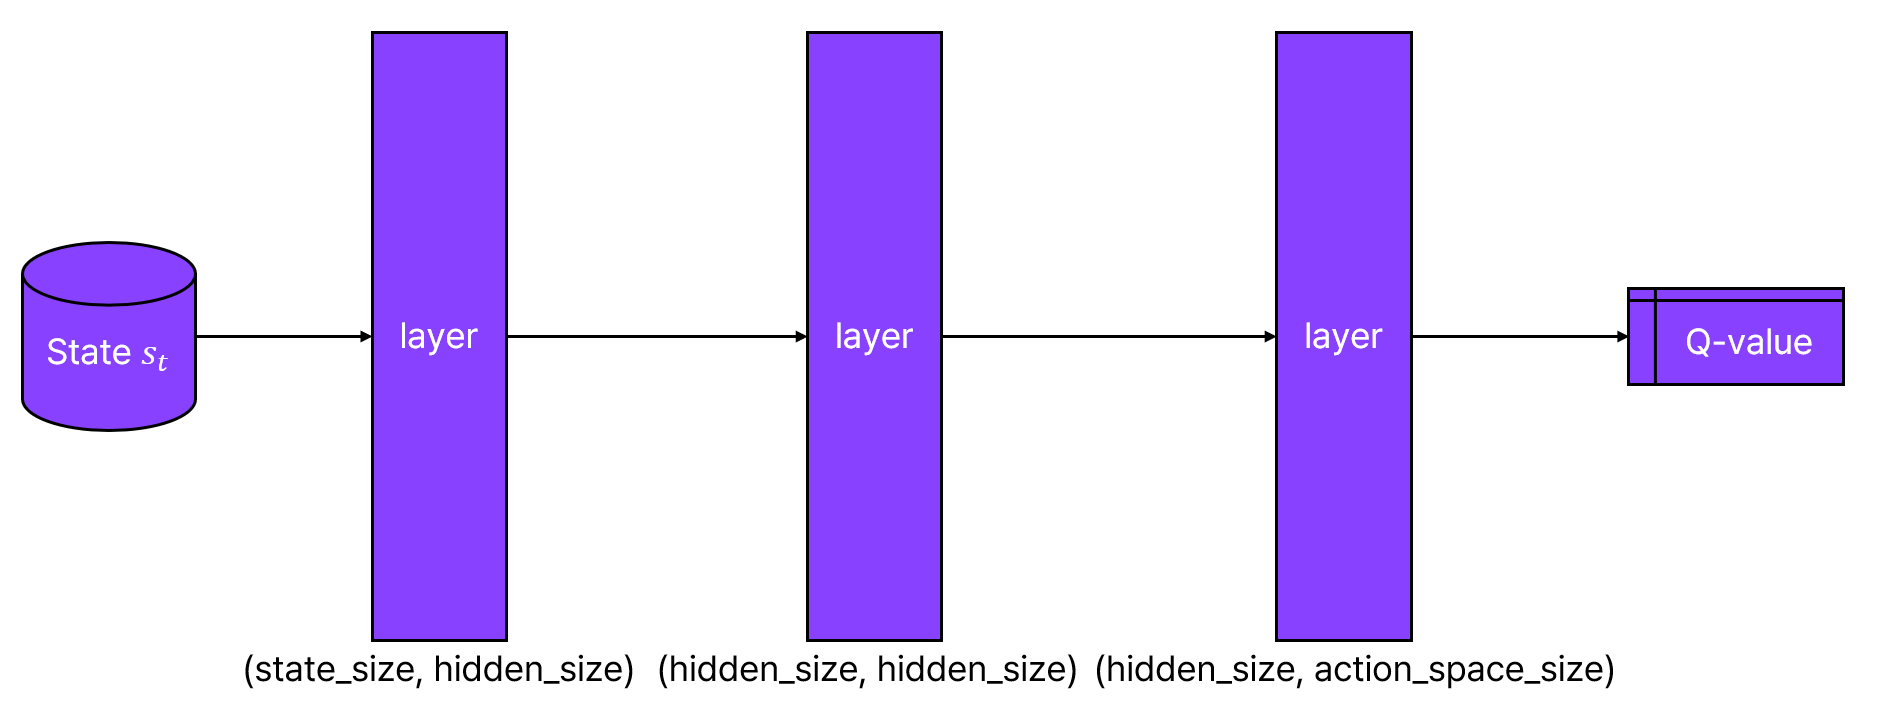

In [7]:
class QNet(nn.Module):
    def __init__(self, state_size, hidden_size, action_space_size):
        super(QNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, action_space_size)
        )
    
    def forward(self, x):
        # xÎäî Í∞Å ÌñâÎèôÏóê ÎåÄÌïú Q-valueÎ•º Î∞òÌôòÌï©ÎãàÎã§.
        x = self.model(x)
        return x
    
    def save_model(self, path):
        torch.save(self.state_dict(), path)

    def load_model(self, path):
        self.load_state_dict(torch.load(path))

### 2-4. Agent Íµ¨ÌòÑ
ÎßàÏßÄÎßâÏúºÎ°ú, DQNÏùÑ Ï†ÅÏö©Ìïú AgentÎ•º Íµ¨ÌòÑÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

#### [TODO] Ï£ºÏÑùÏùò ÏÑ§Î™ÖÏùÑ Îî∞Îùº Q-NetworkÎ•º ÌïôÏäµ ÏãúÌÇ§Îäî `train` Î©îÏÑúÎìúÎ•º ÏôÑÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
`train` Î©îÏÑúÎìúÎäî DQN ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë 6, 7Î≤à Í≥ºÏ†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

6. Replay BufferÏóêÏÑú $D$Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎûúÎç§ÌïòÍ≤å ÏÉòÌîåÎßÅÌïòÏó¨ Q Ìï®ÏàòÏôÄ Target Q Ìï®ÏàòÏóê ÏûÖÎ†•ÌïúÎã§.
7. Î™©ÌëúÌï®ÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú Ïã†Í≤ΩÎßù $\theta$Î•º ÌïôÏäµÏãúÌÇ®Îã§.

Î™©Ìëú Ìï®Ïàò$J_t(\theta)$Îäî ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï†ïÏùòÎê©ÎãàÎã§.
$$
J_t(\theta) = \mathbb{E}\left[ \left( R_t - Q(s_t, a_t; \theta) \right)^2\right] \text{ where } R_t = \begin{cases} r_t & \text{if episode continues} \\ r_t + \gamma \max_{a_{t+1}} \hat{Q}(s_{t+1}, a_{t+1}; \theta^-) & \text{if episode ends} \end{cases}
$$
$\gamma$Îäî Í∞êÍ∞ÄÏú®, $\theta$Îäî Q Ìï®ÏàòÏùò Ïã†Í≤ΩÎßù(ÌååÎùºÎØ∏ÌÑ∞), $\theta^-$Îäî Target Q Ìï®ÏàòÏùò Ïã†Í≤ΩÎßù(ÌååÎùºÎØ∏ÌÑ∞)Î•º ÏùòÎØ∏Ìï©ÎãàÎã§. <br><br>
$R_t$ Îäî EpisodeÍ∞Ä Ï¢ÖÎ£åÎêòÏóàÏùÑ ÎïåÎäî ÌòÑÏû¨ Î≥¥ÏÉÅ, Ï¢ÖÎ£åÎêòÏßÄ ÏïäÏïòÏùÑ ÎïåÎäî ÌòÑÏû¨ Î≥¥ÏÉÅÍ≥º Îã§Ïùå ÏÉÅÌÉúÏóêÏÑúÏùò Target Q Ìï®ÏàòÎ°ú Í≥ÑÏÇ∞Ìïú ÏµúÎåÄ QÍ∞íÏùÑ Ìï©Ìïú Í∞íÏûÖÎãàÎã§.

In [8]:
class DQNAgent():
    def __init__(self, buffer_size, batch_size, gamma, qnet, target_qnet, optimizer, epsilon=1.0, epsilon_decay=0.999, epsilon_min=0.01):
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.qnet = qnet
        self.target_qnet = target_qnet
        self.optimizer = optimizer
        self.buffer = ReplayBuffer(buffer_size)
        self.loss_fn = nn.MSELoss()

        self.init_epsilon = epsilon
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        self.reset()

    def memorize(self, element):
        self.buffer.memorize(element)

    def add_raw_state(self, raw_state):
        self.state_manager.add_raw_state(raw_state)

    def act(self, exploration=True):
        if exploration and random.random() < self.epsilon:
            return env.action_space.sample()
        else:
            state_vector = self.state_manager.get_state_vector()
            with torch.no_grad():
                return np.argmax(self.qnet(state_vector).detach().numpy())
    
    def get_current_state(self):
        return self.state_manager.get_state_vector()

    def update_qnet(self):
        self.target_qnet.load_state_dict(self.qnet.state_dict())

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * (1 - self.epsilon_decay))

    def reset_epsilon(self):
        self.epsilon = self.init_epsilon

    def reset_state_manager(self):
        self.state_manager = StateManager(4)
    
    def reset(self):
        self.reset_epsilon()
        self.reset_state_manager()
    
    def train(self):
        if len(self.buffer.buffer) < self.batch_size:
            return -1
        
        # TODO: [ÏßÄÏãúÏÇ¨Ìï≠ 1A] Î≤ÑÌçºÏóêÏÑú ÎûúÎç§Ìïú self.batch_size ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÉòÌîåÎßÅÌï©ÎãàÎã§.
        # Hint. ReplayBuffer ÌÅ¥ÎûòÏä§Ïùò sample Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
        batch = self.buffer.sample(self.batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, done_mask = zip(*batch) 

        # Í∞Å Îç∞Ïù¥ÌÑ∞Î•º PyTorch TensorÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
        state_batch = torch.stack(state_batch)
        next_state_batch = torch.stack(next_state_batch)

        reward_batch = torch.tensor(reward_batch)
        action_batch = torch.tensor(action_batch)
        done_mask = torch.tensor(done_mask)

        # ÌòÑÏû¨ ÏÉÅÌÉúÏùò Q-valueÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
        q_values = self.qnet(state_batch)
        # Target Q-NetworkÎ•º ÌÜµÌï¥ Îã§Ïùå ÏÉÅÌÉúÏùò Q-valueÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
        next_q_values = self.target_qnet(next_state_batch)
        q_value = q_values.gather(1, action_batch.unsqueeze(-1)).squeeze(-1)
        next_q_value = next_q_values.max(1).values
        
        # TODO: [ÏßÄÏãúÏÇ¨Ìï≠ 1B] Q-valueÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ∏∞ ÏúÑÌïú ÏòàÏÉÅ Q Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
        # Hint. ÌòÑÏû¨ ÏÉÅÌÉúÍ∞Ä Ï¢ÖÍ≤∞ ÏÉÅÌÉúÍ∞Ä ÏïÑÎãê Îïå ÏòàÏÉÅ Q-valueÎäî ÌòÑÏû¨ Î≥¥ÏÉÅ + (Í∞êÍ∞ÄÏú® * Target Q-NetworkÎ•º ÌÜµÌï¥ ÏòàÏ∏°Ìïú Îã§Ïùå ÏÉÅÌÉúÏùò Q Í∞í)ÏûÖÎãàÎã§.
        future_q_value = self.gamma * next_q_value # None Î•º Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.
        # ÌòÑÏû¨ ÏÉÅÌÉúÍ∞Ä Ï¢ÖÍ≤∞ ÏÉÅÌÉúÎùºÎ©¥ ÎØ∏ÎûòÏóê Î∞õÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÎäî Q-ValueÎäî 0ÏûÖÎãàÎã§.
        future_q_value = future_q_value * ~done_mask

        expected_q_value = reward_batch + future_q_value # None Î•º Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

        loss = self.loss_fn(q_value, expected_q_value)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()
    
    def save_model(self, path):
        self.qnet.save_model(path)

    def load_model(self, path):
        self.qnet.load_model(path)
        self.target_qnet.load_model(path)

## 3. Train Ìï®Ïàò Íµ¨ÌòÑ

ÏïÑÎûò Deep Q-Network ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Îî∞Îùº ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÎäî Train Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï©ÎãàÎã§.
1. ÌôòÍ≤ΩÏóêÏÑú ÏûÖÎ†• Î∞õÏùÄ ÏÉÅÌÉú $x_t$Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_t$ Î°ú Î≥ÄÌôòÌïúÎã§.
2. Q Ìï®ÏàòÏóê Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_t$Î•º ÏûÖÎ†•ÌïòÍ≥†, ÏÉùÏÑ±Ìïú ÌñâÎèô $ùëé_ùë°$Î•º ÌôòÍ≤ΩÏóê ÏûÖÎ†•ÌïúÎã§.
3. ÌôòÍ≤ΩÏù¥ Îã§Ïùå ÏÉÅÌÉú $x_{t+1}$Í≥º Î≥¥ÏÉÅ $r_t$, ÏôÑÎ£å Ïó¨Î∂Ä $d_t$Î•º Î∞òÌôòÌïúÎã§. 
4. Î∞òÌôòÎêú $x_{t+1}$Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨Ìïú ÏÉÅÌÉú $s_{t+1}$ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, $(s_t,a_t,r_t,s_{t+1},d_{t+1})$ ÏùÑ Replay BufferÏóê Ï†ÄÏû•ÌïúÎã§.
   1. ÎÖºÎ¨∏Ïùò ÏïåÍ≥†Î¶¨Ï¶òÏóêÎäî $d_{t+1}$ Î≥ÄÏàòÍ∞Ä ÏóÜÏßÄÎßå, Íµ¨ÌòÑ Í≥ºÏ†ïÏóêÏÑúÎäî ÏóêÌîºÏÜåÎìúÍ∞Ä Ï¢ÖÎ£åÎêòÏóàÎäîÏßÄ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî $d_t$Î•º Ï†ÄÏû•Ìï¥Ïïº Ìï©ÎãàÎã§.
5. Replay BufferÏóê Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎã§Î©¥, Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Ïùº Îïå ÍπåÏßÄ 1~4Î•º Î∞òÎ≥µÌïúÎã§.<br><br>
6. Replay BufferÏóêÏÑú $D$Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎûúÎç§ÌïòÍ≤å ÏÑ†ÌÉùÌïòÏó¨ Q Ìï®ÏàòÏôÄ Target Q Ìï®ÏàòÏóê ÏûÖÎ†•ÌïúÎã§.
7. Î™©ÌëúÌï®ÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú Ïã†Í≤ΩÎßù $\theta$Î•º ÌïôÏäµÏãúÌÇ®Îã§.
8. 1Î≤àÏúºÎ°ú ÎèåÏïÑÍ∞ÑÎã§.
10. ÏùºÏ†ï Ï£ºÍ∏∞ $C$ ÎßàÎã§ Target Q Ìï®ÏàòÏùò Ïã†Í≤ΩÎßù $\theta^-$Ïùò Í∞íÏùÑ Q Ìï®ÏàòÏùò Ïã†Í≤ΩÎßù $\theta$Ïùò Í∞íÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ ÌïúÎã§.

#### [TODO] Ï£ºÏÑùÏùò ÏÑ§Î™ÖÏùÑ Îî∞Îùº ÏúÑ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Íµ¨ÌòÑÌïú `train` Ìï®ÏàòÎ•º ÏôÑÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

In [9]:
def train(env, agent, max_step = 100000, max_step_per_episode = 5000, min_buffer_size=500, target_update_interval=10, save_path = None):
    # ÌïôÏäµ Í≥ºÏ†ïÏùÑ Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌïú tqdmÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.
    repeater = tqdm(range(max_step), desc="Step")
    repeater.set_description("Episode - {}".format(0))

    agent.reset()

    done = False

    cur_ep_step = 0
    episode_count = 0
    loss_list = []
    reward_list = []
    reward_sum = 0
    max_reward = -1

    # Step 1-1. ÌôòÍ≤ΩÏóêÏÑú Ï¥àÍ∏∞ ÏÉÅÌÉúÎ•º ÏñªÏäµÎãàÎã§.
    cur_raw_state = env.reset()[0]

    # Step 1-2. ÏÉÅÌÉúÎ•º StateManagerÏóê Ï∂îÍ∞ÄÌï©ÎãàÎã§. StateManagerÎäî Îç∞Ïù¥ÌÑ∞Î•º ÎÇ¥Î∂ÄÏóêÏÑú Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.
    agent.add_raw_state(cur_raw_state)
    
    for step in repeater:
        cur_ep_step += 1

        # Step 1-3. Ï†ÑÏ≤òÎ¶¨Îêú ÏÉÅÌÉú s_tÎ•º ÏñªÏäµÎãàÎã§.
        state = agent.get_current_state()

        # Step 2-1. Q Ìï®ÏàòÏóê Ï†ÑÏ≤òÎ¶¨Îêú ÏÉÅÌÉú s_tÎ•º ÏûÖÎ†•ÌïòÍ≥†, ÏÉùÏÑ±Îêú ÌñâÎèô a_tÎ•º action Î≥ÄÏàòÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
        action = agent.act(exploration=True)

        # TODO: [ÏßÄÏãúÏÇ¨Ìï≠ 2A] ÏÉùÏÑ±Îêú ÌñâÎèôÏùÑ ÌôòÍ≤ΩÏóê Ï†ÅÏö©ÌïòÍ≥†, ÌôòÍ≤ΩÏù¥ Î∞òÌôòÌïòÎäî ÏÉÅÌÉú x_{t+1}, Î≥¥ÏÉÅ r_t, Ï¢ÖÎ£å Ïó¨Î∂Ä d_tÎ•º Ï†ÄÏû•ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
        # Step 2-2. ÏÉùÏÑ±Îêú ÌñâÎèô a_tÎ•º ÌôòÍ≤ΩÏóê Ï†ÅÏö©Ìï©ÎãàÎã§.
        # Step 3. ÌôòÍ≤ΩÏù¥ Îã§Ïùå ÏÉÅÌÉú x_{t+1}, Î≥¥ÏÉÅ r_t, Ï¢ÖÎ£å Ïó¨Î∂Ä d_tÎ•º Î∞òÌôòÌï©ÎãàÎã§.
        # Hint. ÌôòÍ≤ΩÏù¥ Ïñ¥Îñ§ Í∞íÏùÑ Î¶¨ÌÑ¥ÌïòÎäîÏßÄÎäî ÎÖ∏Ìä∏Î∂Å ÏÉÅÎã®Ïùò 1. CartPole ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌôòÍ≤Ω Ï±ïÌÑ∞Ïùò ÏΩîÎìúÎ•º Ï∞∏Í≥†Ìï¥Ï£ºÏÑ∏Ïöî.
        next_raw_state, reward, done, _, _ = env.step(action)
        reward_sum += reward

        # TODO: [ÏßÄÏãúÏÇ¨Ìï≠ 2B] Step 4-1. Î∞òÌôòÎêú x_{t+1} Î•º StateManagerÏóê Ï∂îÍ∞ÄÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨Îêú ÏÉÅÌÉú s_{t+1} ÏùÑ ÏñªÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
        # Hint. agent.add_raw_state() Î©îÏÑúÎìúÏôÄ agent.get_current_state() Î©îÏÑúÎìúÎ•º ÌôúÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.
        agent.add_raw_state(next_raw_state)
        next_state = agent.get_current_state()

        # TODO: [ÏßÄÏãúÏÇ¨Ìï≠ 2C] Step 4-2. (s_t,a_t,r_t,s_{t+1},d_t) 5-tupleÏùÑ Replay BufferÏóê Ï†ÄÏû•ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
        element = (state, action, reward, next_state, done)
        agent.memorize(element)

        # Epsilon-Greedy Ï†ïÏ±ÖÏùò epsilon Í∞íÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.
        agent.decay_epsilon()
        
        # Step 5. Replay BufferÏóê Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎã§Î©¥, Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Ïùº Îïå ÍπåÏßÄ 1~4Î•º Î∞òÎ≥µÌï©ÎãàÎã§.
        if step > min_buffer_size:
            # Step 6, 7. Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥, 6, 7Î≤àÏß∏ Í≥ºÏ†ïÏùÑ Í±∞Ï≥ê Q-NetworkÎ•º ÌïôÏäµÌï©ÎãàÎã§.
            loss = agent.train()
            loss_list.append(loss)
        
        # Step 9. Target Q-NetworkÎ•º ÏùºÏ†ïÌïú Ï£ºÍ∏∞Î°ú ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.
        if step % target_update_interval == 0:
            agent.update_qnet()
        
        # ÏóêÌîºÏÜåÎìúÍ∞Ä Ï¢ÖÎ£åÎêòÎ©¥, Îã§Ïùå ÏóêÌîºÏÜåÎìúÎ•º Ï§ÄÎπÑÌï©ÎãàÎã§.
        if done or cur_ep_step > max_step_per_episode:
            # StateManagerÎ•º Ï¥àÍ∏∞Ìôî Ìï©ÎãàÎã§. (Ïù¥Ï†Ñ episodeÏùò ÏÉÅÌÉúÎ•º Î≤ÑÎ¶ΩÎãàÎã§. Î©îÎ™®Î¶¨Îäî Ï¥àÍ∏∞ÌôîÌïòÏßÄ ÏïäÏäµÎãàÎã§)
            agent.reset_state_manager()

            # ÌôòÍ≤ΩÏùÑ Ï¥àÍ∏∞ÌôîÌïòÏó¨ ÏÉÅÌÉú x_0 ÏùÑ ÏñªÏäµÎãàÎã§.
            cur_raw_state = env.reset()[0]
            agent.add_raw_state(cur_raw_state)
            
            # ÌòÑÏû¨ EpisodeÏùò Ï†ïÎ≥¥Î•º Ï∂úÎ†•Ìï©ÎãàÎã§.
            episode_count += 1
            cur_ep_step = 0
            repeater.set_description("Episode - {}, Total Reward - {}".format(episode_count, reward_sum))

            # RewardÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
            # Ï†ÄÏû•Ìïú Î™®Îç∏ÏùÑ ÌôúÏö©Ìï¥ÏÑú Ï±ÑÏ†êÏùÑ ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ ÏΩîÎìúÎäî ÏàòÏ†ïÌïòÏßÄ ÎßêÏïÑÏ£ºÏÑ∏Ïöî!
            if max_reward < reward_sum:
                max_reward = reward_sum
                # Ïó¨Í∏∞ ÏûàÎäî NoneÏùÄ ÏàòÏ†ïÌïòÏßÄ ÎßêÏïÑÏ£ºÏÑ∏Ïöî!
                if save_path is not None:
                    agent.save_model(save_path + "/best_model.pt")

            reward_list.append(reward_sum)
            reward_sum = 0
            done = False
                
    return loss_list, reward_list

## 4. ÌïôÏäµ ÏßÑÌñâ

ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌïòÍ≥†, ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§. ÌïôÏäµÏóêÎäî ÏïΩ 3Î∂ÑÏù¥ ÏÜåÏöîÎê©ÎãàÎã§.

In [10]:
# Deep Q Network Íµ¨Ï°∞ Í¥ÄÎ†® ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
hidden_size = 64

# Deep Q NetworkÏùò ÏµúÏ†ÅÌôî Ìï®ÏàòÏùò ÌïôÏäµÏú®ÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.
learning_rate = 1e-4

# Replay BufferÏùò ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
buffer_size = 10000

# Í∞êÍ∞ÄÏú®
gamma = 0.99

# ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
batch_size = 32 # Ìïú Î≤àÏóê Replay BufferÏóêÏÑú ÏÉòÌîåÎßÅÌï† Îç∞Ïù¥ÌÑ∞Ïùò Ïàò
max_step = 100000 # Ï¥ù ÌïôÏäµÌï† step Ïàò
max_step_per_episode = 500 # Ìïú Episode Î≥Ñ ÏµúÎåÄ step Ïàò
target_update_interval = 100 # Target Q-NetworkÎ•º ÏóÖÎç∞Ïù¥Ìä∏Ìï† stepÏùò Í∞ÑÍ≤©
min_buffer_size = 500 # Replay BufferÏóê ÏµúÏÜåÌïúÏúºÎ°ú Ï†ÄÏû•ÎêòÏñ¥Ïïº ÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ïàò

# Epsilon-greedy Ï†ïÏ±ÖÏùÑ ÏúÑÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
epsilon = 1.0
epsilon_decay = 0.001
epsilon_min = 0.01

Q Ìï®ÏàòÏôÄ Agent, optimizerÎ•º Ï¥àÍ∏∞Ìôî Ìï©ÎãàÎã§.

In [11]:
qnet = QNet(16, hidden_size=hidden_size, action_space_size=env.action_space.n) # Q Ìï®ÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§
target_qnet = QNet(16, hidden_size=hidden_size, action_space_size=env.action_space.n) # Target Q Ìï®ÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§
target_qnet.load_state_dict(qnet.state_dict()) # Target Q Ìï®ÏàòÏùò Ïã†Í≤ΩÎßùÏùÑ Q Ìï®ÏàòÏùò Ïã†Í≤ΩÎßùÏúºÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.

optimizer = torch.optim.Adam(qnet.parameters(), lr=learning_rate) # Q Ìï®ÏàòÎ•º ÌïôÏäµÏãúÌÇ¨ ÏµúÏ†ÅÌôî Ìï®ÏàòÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.

agent = DQNAgent(buffer_size=buffer_size,
                 batch_size=batch_size,
                 gamma = gamma,
                 qnet=qnet,
                 target_qnet=target_qnet,
                 optimizer=optimizer,
                 epsilon=epsilon,
                 epsilon_decay=epsilon_decay,
                 epsilon_min=epsilon_min) # Q Ìï®ÏàòÏôÄ Target Q Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ DQNAgentÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [12]:
import os

if not os.path.exists("ckpt"):
    os.makedirs("ckpt")

loss_log, reward_log = train(env,
                             agent,
                             max_step=max_step,
                             max_step_per_episode=max_step_per_episode,
                             min_buffer_size=min_buffer_size,
                             target_update_interval=target_update_interval,
                             save_path="ckpt")

Episode - 955, Total Reward - 501.0: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100000/100000 [02:37<00:00, 635.76it/s]


## 6. ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî

ÌïôÏäµÏù¥ Ï¢ÖÎ£åÎêòÏóàÏúºÎ©¥, Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

Î®ºÏ†Ä ÌïôÏäµ Í≥ºÏ†ïÏùò Loss Í∞íÏùÑ ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Ïù¥Îïå 50 stepÏùò ÌèâÍ∑† Loss Í∞íÏùÑ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

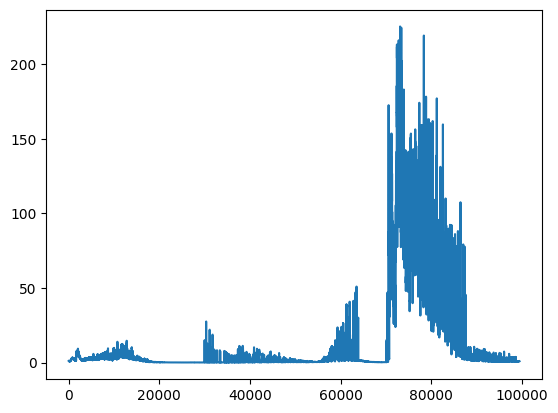

In [13]:
# plot rolling avg of loss
def rolling_avg(data, window_size=50):
    return [np.mean(data[i:i+window_size]) for i in range(len(data) - window_size)]

plt.plot(rolling_avg(loss_log))

Îã§ÏùåÏúºÎ°ú, Îß§ episode Î≥Ñ RewardÎ•º ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

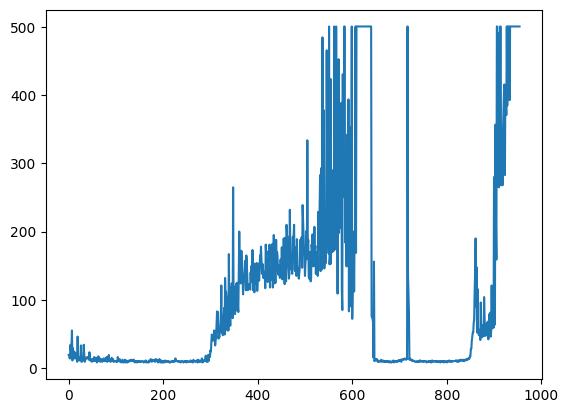

In [14]:
plt.plot(reward_log)

Ïñ¥Îäê ÏãúÏ†ê Ïù¥ÌõÑÎ°ú RewardÍ∞Ä Í∏âÍ≤©Ìûà Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Îã§ÏùåÏúºÎ°ú, Best ModelÏùÑ Î∂àÎü¨ÏôÄ CartPole ÌôòÍ≤ΩÏóêÏÑú ÌÖåÏä§Ìä∏Î•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [15]:
# ÌïôÏäµÎêú ÏóêÏù¥Ï†ÑÌä∏Î•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
# ÌôòÍ≤ΩÏùÑ Ï¥àÍ∏∞ÌôîÌïú ÌõÑ Ï¥àÍ∏∞ ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
env = gym.make('CartPole-v1', render_mode='rgb_array')
raw_state = env.reset()[0]
render_queue = []
agent.load_model("ckpt/best_model.pt")
agent.reset_state_manager()
done = False

while done == False:
    render_queue.append(env.render())
    agent.add_raw_state(raw_state)
    action = agent.act(exploration=False)
    next_state, reward, done, _, _ = env.step(action)
    raw_state = next_state
            
env.close()

ÌÖåÏä§Ìä∏ Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

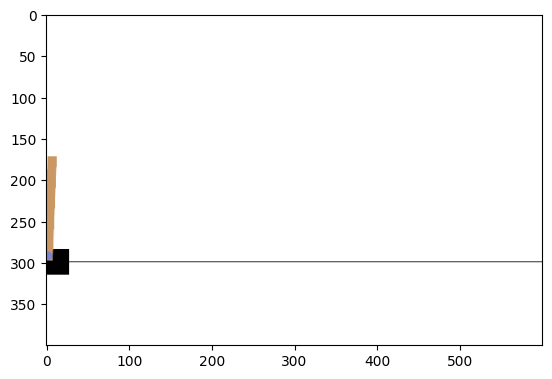

In [16]:
# ÏãúÍ∞ÅÌôî Î∞è Í≤∞Í≥º Ï†ÄÏû•
visualize_render_queue(render_queue)

### Í≤∞Í≥º Ï†úÏ∂ú

- ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Ï†úÏùº RewardÍ∞Ä ÎÜíÏùÄ Î™®Îç∏ÏùÄ `ckpt/best_model.pt` Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
- ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÏó¨ Ïó¨Îü¨Î∂ÑÏù¥ ÏÇ¨Ïö©ÌïòÏã† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÎ°ú Ï†ÄÏû•Ìï¥Ï£ºÏÑ∏Ïöî.

In [17]:
# Ïó¨Îü¨Î∂ÑÏù¥ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÇ¨Ïö©ÌïòÏã† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÄÏû•Ìï©ÎãàÎã§.
import json

hyperparameters = {
    "hidden_size": hidden_size,
    "learning_rate": learning_rate,
    "buffer_size": buffer_size,
    "gamma": gamma,
    "batch_size": batch_size,
    "max_step": max_step,
    "max_step_per_episode": max_step_per_episode,
    "target_update_interval": target_update_interval,
    "min_buffer_size": min_buffer_size,
    "epsilon": epsilon,
    "epsilon_decay": epsilon_decay,
    "epsilon_min": epsilon_min
}

with open("ckpt/hyperparameters.json", "w") as f:
    json.dump(hyperparameters, f)

- ÌååÏùº Ï†ÄÏû•Ïù¥ ÏôÑÎ£åÎêòÏóàÏúºÎ©¥ Ïö∞Ï∏° ÏÉÅÎã®Ïóê ÏûàÎäî Î≥¥ÎùºÏÉâ `Ï†úÏ∂ú` Î≤ÑÌäºÏùÑ ÎàåÎü¨ Î™®Îç∏ ÌååÏùºÏùÑ Ï†úÏ∂úÌï¥Ï£ºÏÑ∏Ïöî.
- Ï±ÑÏ†ê ÌôòÍ≤ΩÏóêÏÑú AgentÍ∞Ä 300 step Ïù¥ÏÉÅ Î≤ÑÌã∞Î©¥ ÏÑ±Í≥µÏûÖÎãàÎã§.
- 5Î≤à ÏãúÎèÑÌïú ÌõÑ ÌïúÎ≤àÎèÑ ÏÑ±Í≥µÌïòÏßÄ Î™ªÌïòÎ©¥ Ïã§Ìå®Î°ú Í∞ÑÏ£ºÌï©ÎãàÎã§.

### 